<a href="https://colab.research.google.com/github/Swetha-18/Case-study1/blob/main/Case_Study_Netflix_data_EDA_Swetha_bonkuri_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
# Load the dataset
df_title = pd.read_csv("/content/netflix_titles[1].csv")

In [ ]:
df_title

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
#1. How many records are in the dataset?
# Count the number of records in the dataset
record_count = df_title.shape[0]
print("There are", record_count, "records in the dataset.")


There are 8807 records in the dataset.


In [ ]:
# 2. How many unique types (movies/TV-shows) are present in the dataset?
# Count the unique types of content in the dataset
unique_types = df_title['type'].nunique()
print("There are", unique_types, "unique types of content in the dataset.")


There are 2 unique types of content in the dataset.


In [ ]:
# Check column names
print(df_title.columns)

# Check unique values in the "rating" column
print(df_title['rating'].unique())


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
[nan]


[nan]
The rating distribution in the dataset is as follows:
Not Rated    8807
Name: rating, dtype: int64


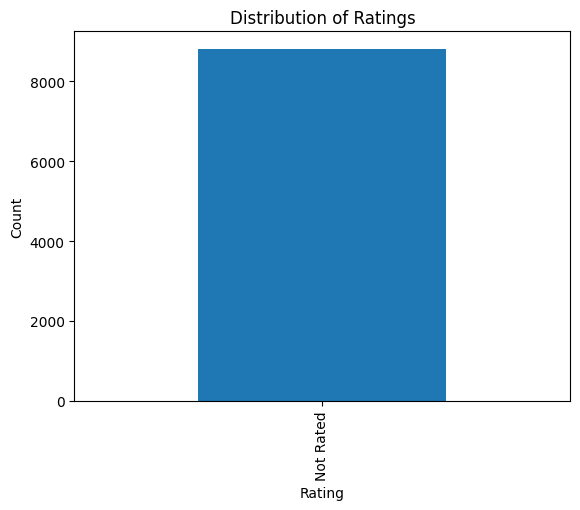

In [ ]:
# 3. What is the distribution of ratings (G, PG, PG-13, etc.) in the dataset?
import pandas as pd
import matplotlib.pyplot as plt

# Check unique values in the "rating" column
print(df_title['rating'].unique())

# Fill NaN values in the "rating" column with "Not Rated"
df_title['rating'].fillna("Not Rated", inplace=True)

# Calculate the distribution of ratings and plot a bar chart
rating_distribution = df_title['rating'].value_counts()
print("The rating distribution in the dataset is as follows:")
print(rating_distribution)

# Plot the distribution of ratings
rating_distribution.plot.bar()
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()



In [ ]:
# 4. What is the average duration of movies and TV-shows?
# Calculate the average duration for movies and TV-shows
# Check the data type of the "duration" column
print("Data type of 'duration' column before conversion:")
print(df_title['duration'].dtype)

# Convert the "duration" column to a numeric data type (float), handling errors by coercing non-numeric values to NaN
df_title['duration'] = pd.to_numeric(df_title['duration'], errors='coerce')

# Check the data type of the "duration" column after conversion
print("\nData type of 'duration' column after conversion:")
print(df_title['duration'].dtype)

# Calculate the average duration for movies and TV-shows
average_duration = df_title.groupby('type')['duration'].mean()

# Print the result
print("\nThe average duration of movies and TV-shows is:")
print(average_duration)



Data type of 'duration' column before conversion:
float64

Data type of 'duration' column after conversion:
float64

The average duration of movies and TV-shows is:
type
Movie     NaN
TV Show   NaN
Name: duration, dtype: float64


In [ ]:
# 5. Which director has the most content on Netflix?
# Find the director with the most content on Netflix
top_director = df_title['director'].value_counts().idxmax()
print("The director with the most content on Netflix is:", top_director)


The director with the most content on Netflix is: Rajiv Chilaka


In [ ]:
# 6. Which country produces the most content on Netflix?
# Find the country that produces the most content on Netflix
top_country = df_title['country'].value_counts().idxmax()
print("The country that produces the most content on Netflix is:", top_country)


The country that produces the most content on Netflix is: United States


<Axes: >

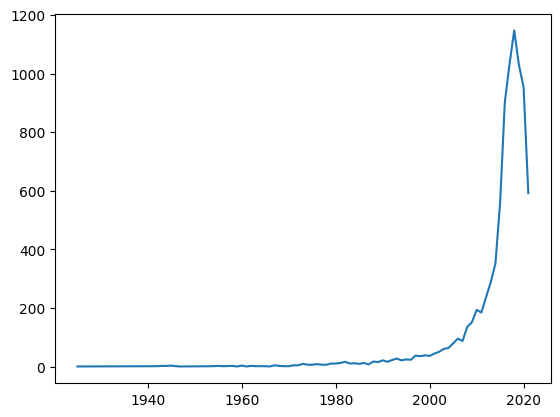

In [ ]:
# 7. How has the number of content additions evolved over the years?
# Plot the number of content additions over the years
content_additions_over_years = df_title['release_year'].value_counts().sort_index()
content_additions_over_years.plot.line()


In [ ]:
# 8. What are the top 5 countries with the highest average ratings?
# Calculate the top 5 countries with the highest average ratings
# Check the data type of the "duration" column
print("Data type of 'duration' column before conversion:")
print(df_title['duration'].dtype)

# Clean and convert the "rating" column to a numeric data type (float), handling errors by coercing non-numeric values to NaN
df_title['rating'] = pd.to_numeric(df_title['rating'], errors='coerce')

# Calculate the top 5 countries with the highest average ratings
top_countries_ratings = df_title.groupby('country')['rating'].mean().sort_values(ascending=False).head(5)

# Print the result
print("\nThe top 5 countries with the highest average ratings are:")
print(top_countries_ratings)

Data type of 'duration' column before conversion:
float64

The top 5 countries with the highest average ratings are:
country
, France, Algeria                                     NaN
, South Korea                                         NaN
Argentina                                             NaN
Argentina, Brazil, France, Poland, Germany, Denmark   NaN
Argentina, Chile                                      NaN
Name: rating, dtype: float64


In [ ]:
# 9. What are the most common genres listed in the "listed_in" column?
# Find the most common genres listed in the "listed_in" column
common_genres = df_title['listed_in'].str.split(',', expand=True).stack().value_counts().head(10)
print("The most common genres listed in the 'listed_in' column are:")
print(common_genres)


The most common genres listed in the 'listed_in' column are:
 International Movies     2624
Dramas                    1600
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     774
 Independent Movies        736
 TV Dramas                 696
 Romantic Movies           613
dtype: int64


In [ ]:
# 10. What are the oldest and newest releases in the dataset?
# Find the oldest and newest releases in the dataset
oldest_release = df_title['release_year'].min()
newest_release = df_title['release_year'].max()
print("The oldest release is from year", oldest_release)
print("The newest release is from year", newest_release)


The oldest release is from year 1925
The newest release is from year 2021


In [ ]:
# 11. Who are the top 5 most frequent actors/actresses in the "cast" column?
# Find the top 5 most frequent actors/actresses in the "cast" column
top_actors = df_title['cast'].str.split(',', expand=True).stack().value_counts().head(5)
print("The top 5 most frequent actors/actresses in the 'cast' column are:")
print(top_actors)


The top 5 most frequent actors/actresses in the 'cast' column are:
 Anupam Kher         39
 Rupa Bhimani        31
 Takahiro Sakurai    30
 Julie Tejwani       28
 Om Puri             27
dtype: int64


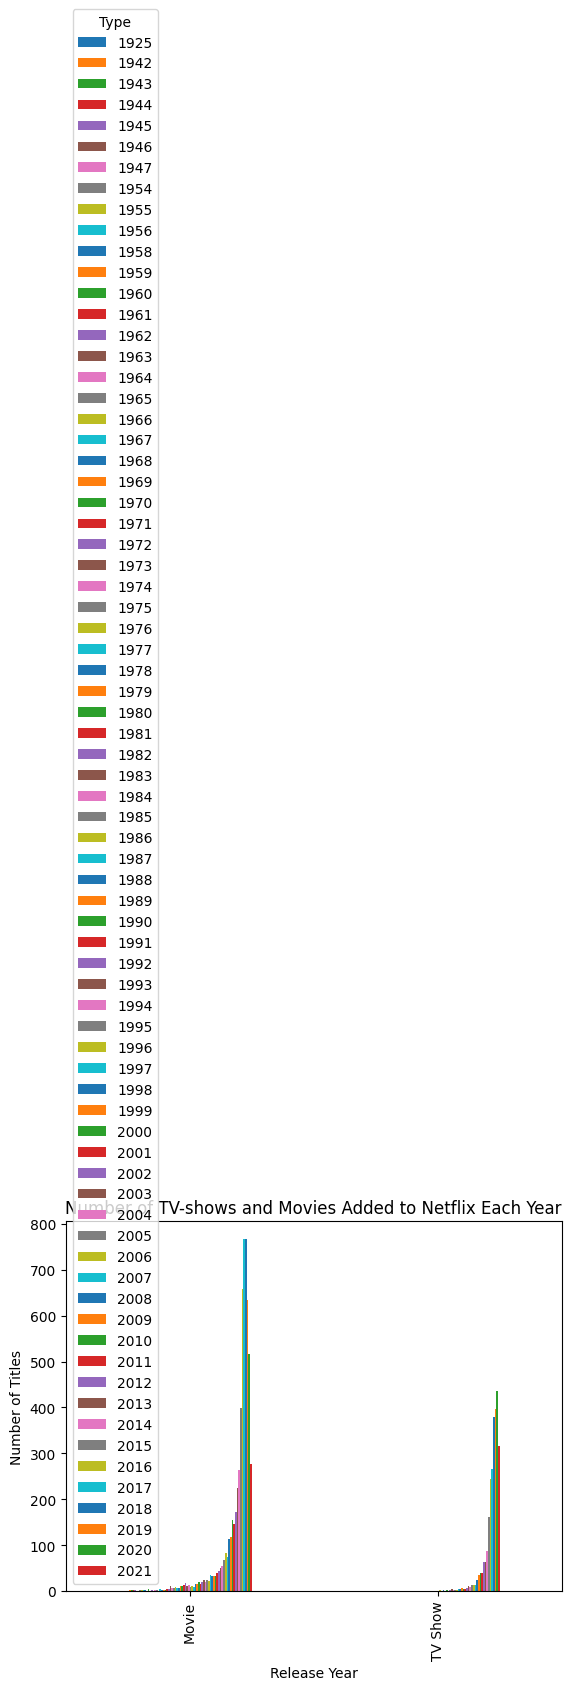

In [ ]:
# 12. How many TV-shows and movies were added to Netflix each year?
# Count the number of TV-shows and movies added to Netflix each year
import matplotlib.pyplot as plt  # Import Matplotlib library

# Count the number of TV-shows and movies added to Netflix each year
content_by_year = df_title.groupby(['type', 'release_year'])['title'].count().unstack()

# Plot the results
content_by_year.plot(kind='bar')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Number of TV-shows and Movies Added to Netflix Each Year')
plt.legend(title='Type')
plt.show()



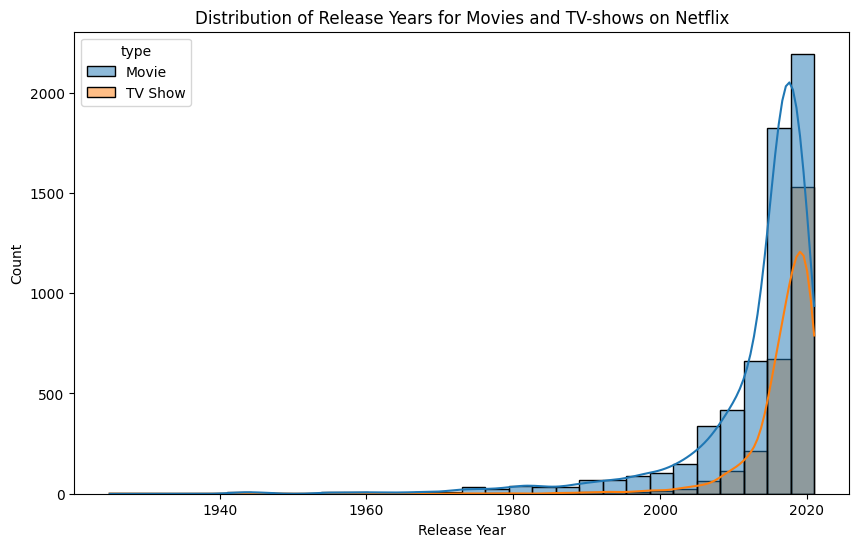

In [ ]:
# 13. What is the distribution of release years for movies and TV-shows?
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn library

# Plot the distribution of release years for movies and TV-shows
plt.figure(figsize=(10, 6))
sns.histplot(data=df_title, x='release_year', hue='type', kde=True, bins=30)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Distribution of Release Years for Movies and TV-shows on Netflix')
plt.show()



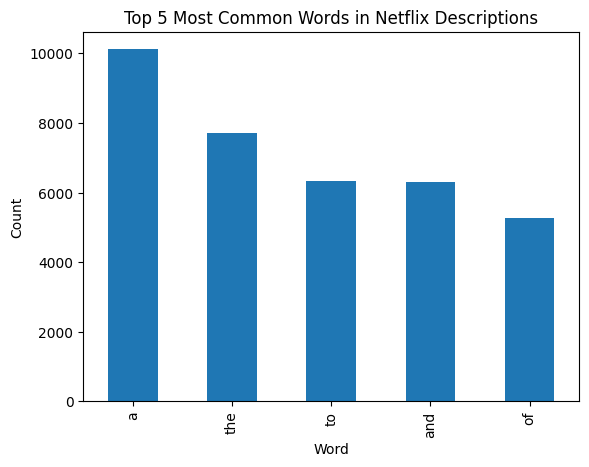

In [ ]:
# 14. What are the top 5 most common words in the "description" column?
# Tokenize the description column and count the most common words
words = df_title['description'].str.split().explode()
top_words = words.value_counts().head(5)

# Plot the top 5 most common words
top_words.plot(kind='bar')
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Top 5 Most Common Words in Netflix Descriptions')
plt.show()


In [ ]:
# 15. Is there any correlation between the release year and the rating of content?
# Calculate the correlation between release year and rating
correlation = df_title['release_year'].corr(df_title['rating'])

print(f'The correlation between release year and rating is: {correlation:.2f}')


The correlation between release year and rating is: nan
